# Clustering 
1.loading data
2.data cleaning
3.modelling

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#data reading and assinging it to a name data
data = pd.read_csv(r"Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Converting exports,imports and health spending percentages to absolute values.
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [4]:
#checking shape
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#data cleaning percentage
round(100*(data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [8]:
data.describe([0.25,0.50,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


# data preparation

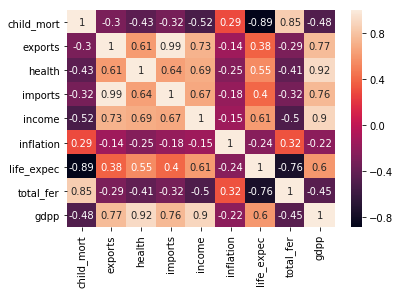

In [9]:
#cheking correlation
cor = data.corr()
sns.heatmap(cor,annot = True)

a lot of variable is correlated so pca needed here

In [10]:
#making new data frame for pca and dropping country
data1 = data.drop('country',axis = 1)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
#scaling the data and assinging it to a new value data2
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data2 = standard_scaler.fit_transform(data1)

In [12]:
data2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [13]:
#importing pca 
from sklearn.decomposition import PCA
pca = PCA(svd_solver  = 'randomized',random_state = 42)

In [14]:
#applying pca
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
#checking list of pca
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [16]:
#checking variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

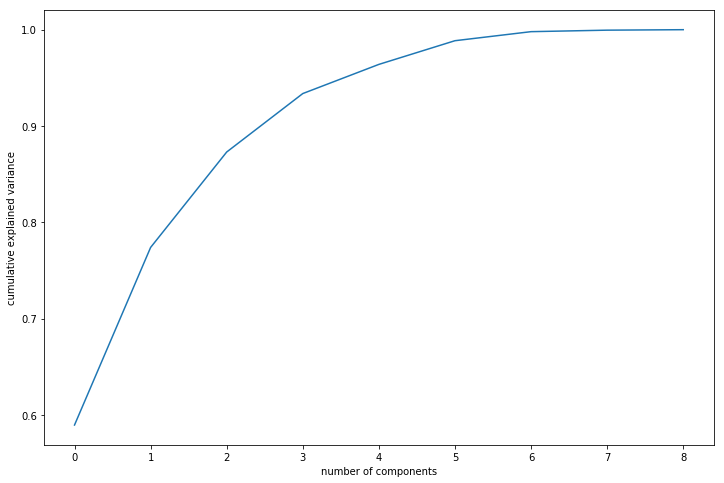

In [17]:
#plotting screeplot and checking cumulative explained variance
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

90% is data is clearly explained by 3 components so use them

In [18]:
#checking first three principal cmponents
colnames = list(data1.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':colnames})
pcs_df

,PC1,PC2,PC3,Feature
0,-0.316392,0.476267,-0.150012,child_mort
1,0.342887,0.397311,-0.030574,exports
2,0.358535,0.155053,-0.075703,health
3,0.344865,0.370781,-0.072174,imports
4,0.380041,0.128384,0.145764,income
5,-0.143085,0.221261,0.948419,inflation
6,0.343857,-0.369820,0.196752,life_expec
7,-0.302842,0.459715,-0.077834,total_fer
8,0.399988,0.200624,0.010339,gdpp


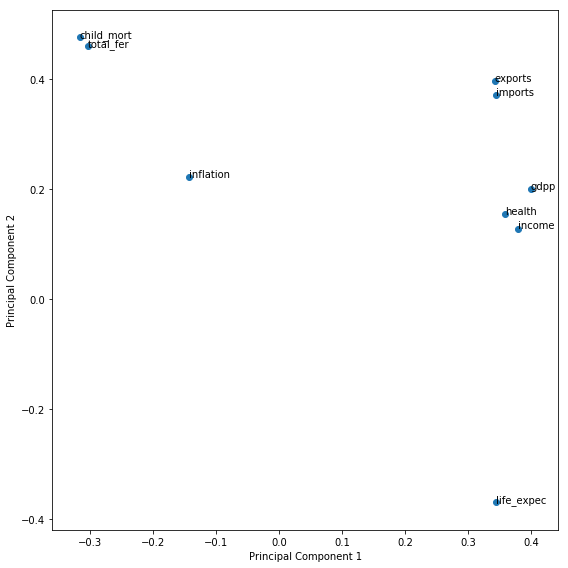

In [19]:
#plotting the first 2 principal components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [20]:
#choosing 3 principal components and using incremental pca
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [21]:
#projecting our original data on 3 principal components
df_pca = pca_final.fit_transform(data2)
df_pca.shape

(167, 3)

In [22]:
df_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [23]:
#taking transpose to create new matrics
transpose_pc  = np.transpose(df_pca)
transpose_pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [24]:
#create new dataframe on new value
rownames = list(data['country'])
new_df2 = pd.DataFrame({'country':rownames,'PC1':transpose_pc[0],'PC2':transpose_pc[1],'PC3':transpose_pc[2]})
new_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


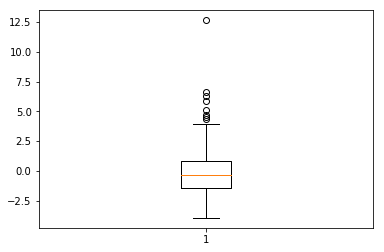

In [25]:
#outlier treatment 
plt.boxplot(new_df2.PC1) 
Q1 = new_df2.PC1.quantile(0.05)
Q2 = new_df2.PC1.quantile(0.95)
IQR = Q2-Q1
new_df2 = new_df2[(new_df2.PC1 >=Q1) & (new_df2.PC1 <= Q2)]

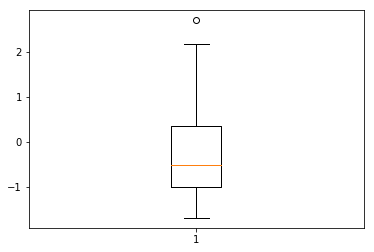

In [26]:
plt.boxplot(new_df2.PC2) 
Q1 = new_df2.PC2.quantile(0.05)
Q2 = new_df2.PC2.quantile(0.95)
IQR = Q2-Q1
new_df2 = new_df2[(new_df2.PC2 >=Q1) & (new_df2.PC2 <= Q2)]

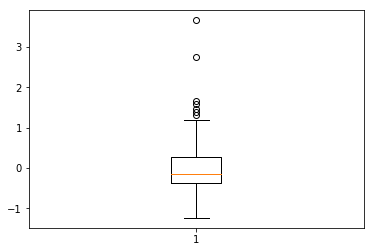

In [27]:
plt.boxplot(new_df2.PC3) 
Q1 = new_df2.PC3.quantile(0.05)
Q2 = new_df2.PC3.quantile(0.95)
IQR = Q2-Q1
new_df2 = new_df2[(new_df2.PC3 >=Q1) & (new_df2.PC3 <= Q2)]

In [28]:
new_df2.shape

(119, 4)

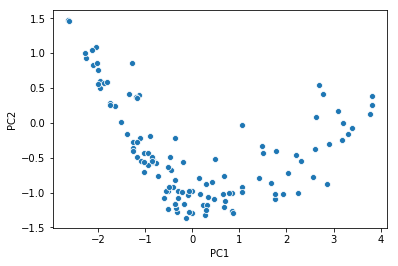

In [29]:
# check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=new_df2)

# Cheking hopkins statistics

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(new_df2.drop(['country'],axis = 1))

0.7296305554096811

HOPKINS STARISTICS HAS CAME CLOSER TO  82% IT MEANS DATA IS SUITABLE FOR CLUSTERING

In [32]:
#assinging a new data for further process
data_new = new_df2
data_new = data_new.drop(['country'],axis = 1)
data_new = standard_scaler.fit_transform(data_new)

# now K-MEANS clustering

In [33]:
#checking sillhoute score 
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_new)
    sse_.append([k, silhouette_score(data_new, kmeans.labels_)])

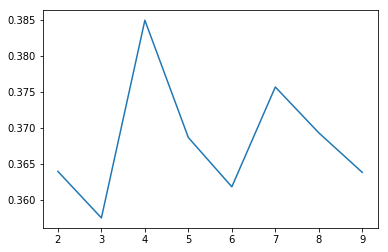

In [34]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

from sillheote score it is better showing to create 5 clusters

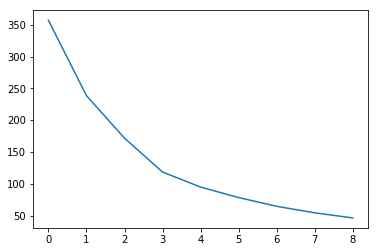

In [35]:
#checking elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(data_new)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [36]:
#creating k=5 clusters
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus5.fit(data_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [37]:
data_new2 = new_df2
data_new2.index = pd.RangeIndex(len(data_new2.index))
data_mean = pd.concat([data_new2,pd.Series(model_clus5.labels_)],axis = 1)
data_mean.columns = ['country','PC1','PC2','PC3','ClusterID']
data_mean.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3
3,Armenia,-0.332692,-1.274517,0.176636,3
4,Australia,3.180362,-0.250785,-0.116877,0


In [38]:
data_mean['ClusterID'].value_counts()

3    51
0    24
1    19
4    18
2     7
Name: ClusterID, dtype: int64

Each cluster has good range of data 

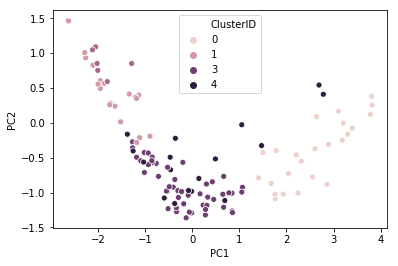

In [39]:
sns.scatterplot(x = 'PC1',y = "PC2",hue = "ClusterID",data=data_mean)

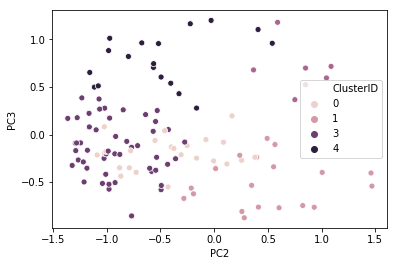

In [40]:
sns.scatterplot(x = 'PC2',y = "PC3",hue = "ClusterID",data=data_mean)

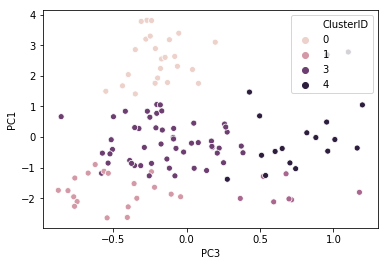

In [41]:
sns.scatterplot(x = 'PC3',y = "PC1",hue = "ClusterID",data=data_mean)

In [42]:
#create cluster mean and merge in main data
main_data = pd.merge(data,data_mean,on = 'country')
main_data2=main_data[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clus_child_mort = pd.DataFrame(main_data2.groupby(['ClusterID']).child_mort.mean())
clus_exports = pd.DataFrame(main_data2.groupby(['ClusterID']).exports.mean())
clus_health = pd.DataFrame(main_data2.groupby(['ClusterID']).health.mean())
clus_imports = pd.DataFrame(main_data2.groupby(['ClusterID']).imports.mean())
clus_income = pd.DataFrame(main_data2.groupby(['ClusterID']).income.mean())
clus_inflation = pd.DataFrame(main_data2.groupby(['ClusterID']).inflation.mean())
clus_life_expec = pd.DataFrame(main_data2.groupby(['ClusterID']).life_expec.mean())
clus_total_fer = pd.DataFrame(main_data2.groupby(['ClusterID']).total_fer.mean())
clus_gdpp = pd.DataFrame(main_data2.groupby(['ClusterID']).gdpp.mean())

In [43]:
data_n = pd.concat([pd.Series([0,1,2,3,4]),clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_inflation,clus_life_expec,clus_total_fer,clus_gdpp],axis=1)

In [44]:
data_n.columns = ['ClusterID','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
data_n

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.820833,13514.487500,3516.844583,13502.583333,34570.833333,1.182625,80.137500,1.707917,35108.333333
1,1,65.084211,787.408095,145.439137,969.381895,3983.157895,6.446842,61.657895,4.266842,2025.947368
2,2,67.085714,1547.557143,147.828571,961.131429,6788.571429,18.942857,64.957143,4.627143,3041.428571
3,3,22.288235,2791.649273,397.399039,3140.125002,11103.137255,4.564137,73.003922,2.330784,6122.392157
4,4,21.766667,6286.320867,448.595522,4368.055889,22387.777778,13.855556,72.788889,2.221667,10623.888889


We observe that child_mortality income , inflation and gdpp is good predictor of the devlopment of country 
so lets check cluster amomg these

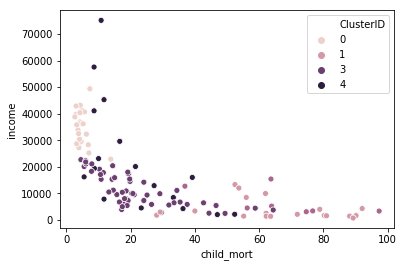

In [45]:
#Along child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=main_data2)

In [46]:
df3 = main_data2[main_data2['ClusterID']==2]
df3

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,"Congo, Rep.",63.9,2331.74,1498.78,67.404,5190,20.7,60.4,4.95,2740,2
38,Gabon,63.7,5048.75,1653.75,306.250,15400,16.6,62.9,4.08,8750,2
42,Ghana,74.7,386.45,601.29,68.382,3060,16.6,62.2,4.27,1310,2
52,Iraq,36.9,1773.00,1534.50,378.450,12700,16.6,67.2,4.56,4500,2
71,Mauritania,97.4,608.40,734.40,52.920,3320,18.9,68.2,4.98,1200,2
100,Sudan,76.7,291.56,254.56,93.536,3370,19.6,66.3,4.88,1480,2
118,Yemen,56.3,393.00,450.64,67.858,4480,23.6,67.5,4.67,1310,2


In [47]:
df4 = main_data2[main_data2['ClusterID']==4]
df4

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,1400.440,185.9820,12900,16.10,76.5,2.89,4460,4
6,Azerbaijan,39.2,3171.1200,1208.880,343.3920,16000,13.80,69.1,1.92,5840,4
8,Bahrain,8.6,14386.5000,10536.300,1028.7900,41100,7.44,76.0,2.16,20700,4
11,Belarus,5.5,3099.4200,3889.350,338.2830,16200,15.10,70.4,1.49,6030,4
21,Chile,8.7,4863.3000,4037.700,1026.8400,19400,8.96,79.1,1.88,12900,4
50,Indonesia,33.3,755.7300,696.640,81.1710,8430,15.30,69.9,2.48,3110,4
51,Iran,19.3,1593.3200,1266.820,365.6800,17400,15.90,74.5,1.76,6530,4
58,Kazakhstan,21.5,4008.9400,2711.930,389.1030,20100,19.50,68.4,2.60,9070,4
60,Kuwait,10.8,25679.5000,11704.000,1012.5500,75200,11.20,78.2,2.21,38500,4
65,Libya,16.6,7937.6000,5094.100,469.4800,29600,14.20,76.1,2.41,12100,4


In [48]:
main_data2[main_data2['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,0
5,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,0
7,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,0
19,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,0
27,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,0
28,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,0
36,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,0
37,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,0
41,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,0
43,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,0


In [49]:
main_data2[main_data2['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,1
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,1
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,1
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,1
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,1
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,1
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,1
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,1
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,1
73,"Micronesia, Fed. Sts.",40.0,672.1000,2316.600,406.1200,3340,3.80,65.4,3.46,2860,1


In [50]:
main_data2[main_data2['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,3
3,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,3
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,3
10,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,3
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,3
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,3
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,3
16,Brazil,19.8,1198.40000,1321.600000,1009.1200,14500,8.410,74.2,1.80,11200,3
17,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,3
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,3


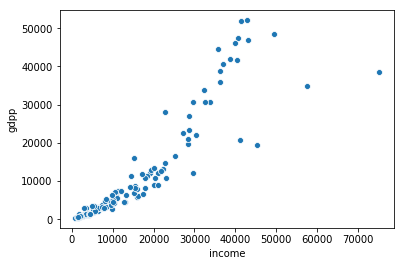

In [51]:
sns.scatterplot(x='income',y='gdpp',data=main_data2)

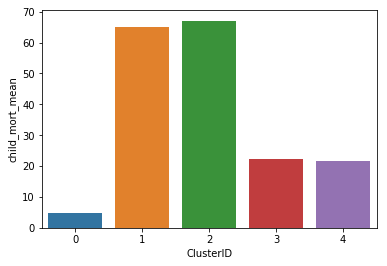

In [52]:
sns.barplot(x=data_n.ClusterID, y=data_n.child_mort_mean)


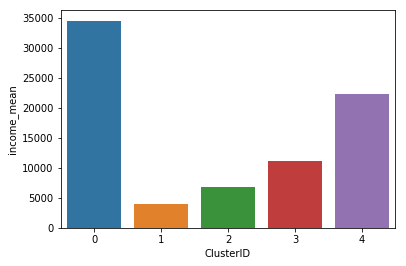

In [53]:
sns.barplot(x = data_n.ClusterID,y = data_n.income_mean)

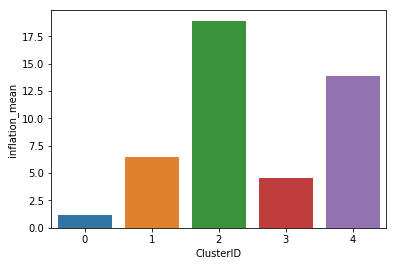

In [54]:
sns.barplot(x = data_n.ClusterID,y = data_n.inflation_mean)

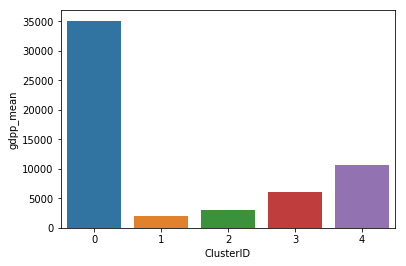

In [55]:
sns.barplot(x = data_n.ClusterID,y = data_n.gdpp_mean)

# Hierarchical Clustering

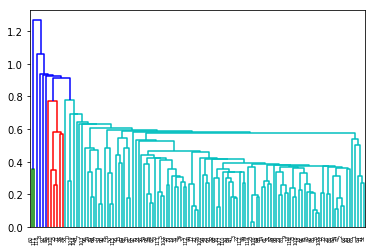

In [56]:
# heirarchical clustering
mergings = linkage(data_new, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

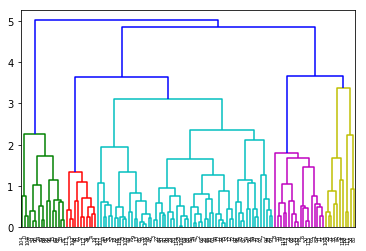

In [57]:
#complete method 
mergings = linkage(data_new, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dat_hc = pd.concat([data_new2, clusterCut], axis=1)
dat_hc.columns = ['country','PC1','PC2','PC3','ClusterID']
dat_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,3


In [60]:
#create cluster mean and merge in main data
data_n2 = pd.merge(data,dat_hc,on = 'country')
data_hc2=data_n2[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clus_child_mort = pd.DataFrame(data_hc2.groupby(['ClusterID']).child_mort.mean())
clus_exports = pd.DataFrame(data_hc2.groupby(['ClusterID']).exports.mean())
clus_health = pd.DataFrame(data_hc2.groupby(['ClusterID']).health.mean())
clus_imports = pd.DataFrame(data_hc2.groupby(['ClusterID']).imports.mean())
clus_income = pd.DataFrame(data_hc2.groupby(['ClusterID']).income.mean())
clus_inflation = pd.DataFrame(data_hc2.groupby(['ClusterID']).inflation.mean())
clus_life_expec = pd.DataFrame(data_hc2.groupby(['ClusterID']).life_expec.mean())
clus_total_fer = pd.DataFrame(data_hc2.groupby(['ClusterID']).total_fer.mean())
clus_gdpp = pd.DataFrame(data_hc2.groupby(['ClusterID']).gdpp.mean())
data_n3 = pd.concat([pd.Series([0,1,2,3,4]),clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_inflation,clus_life_expec,clus_total_fer,clus_gdpp],axis=1)
data_n3.columns = [['ClusterID','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
data_n3.head()

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,69.087500,594.807113,130.643663,785.041625,3715.625000,7.110000,60.950000,4.455000,1763.937500
1,1,20.494444,3158.172422,408.756389,2647.535444,14898.888889,12.316667,72.927778,2.024444,6994.555556
2,2,20.680952,4264.106110,806.171387,4647.357192,14456.984127,3.470492,73.857143,2.284762,10339.206349
3,3,4.636364,17297.281818,4732.337273,16693.118182,39818.181818,1.831182,80.736364,1.789091,43381.818182
4,4,47.472727,7308.767273,386.551182,4668.677273,22338.181818,17.400000,68.536364,3.815455,11196.363636


In [68]:
data_hc2[data_hc2['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,2
7,Bahamas,13.8,9800.00000,12236.000000,2209.2000,22900,-0.393,73.8,1.86,28000,2
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,2
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,2
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,2
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,2
17,Bulgaria,10.8,3433.68000,3625.200000,469.9080,15300,1.110,73.9,1.57,6840,2
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,2


In [69]:
data_hc2[data_hc2['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,3
5,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,3
19,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,3
36,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,3
37,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,3
41,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,3
48,Iceland,2.6,22374.6,18142.7,3938.60,38800,5.470,82.0,2.20,41900,3
70,Malta,6.8,32283.0,32494.0,1825.15,28300,3.830,80.3,1.36,21100,3
102,Sweden,3.0,24070.2,21204.7,5017.23,42900,0.991,81.5,1.98,52100,3
112,United Kingdom,5.2,10969.8,11981.2,3749.96,36200,1.570,80.3,1.92,38900,3


In [70]:
data_hc2[data_hc2['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,2480.8200,3150.330,351.8820,8460,3.56,58.6,3.60,5190,0


In [71]:
data_hc2[data_hc2['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,1400.440,185.982,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,3171.1200,1208.880,343.392,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,14386.5000,10536.300,1028.790,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,3099.4200,3889.350,338.283,16200,15.10,70.4,1.49,6030,1
16,Brazil,19.8,1198.4000,1321.600,1009.120,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,4863.3000,4037.700,1026.840,19400,8.96,79.1,1.88,12900,1
50,Indonesia,33.3,755.7300,696.640,81.171,8430,15.30,69.9,2.48,3110,1
51,Iran,19.3,1593.3200,1266.820,365.680,17400,15.90,74.5,1.76,6530,1
55,Jamaica,18.1,1464.8400,2321.280,225.108,8000,9.81,74.7,2.17,4680,1
65,Libya,16.6,7937.6000,5094.100,469.480,29600,14.20,76.1,2.41,12100,1


In [72]:
data4 = data_hc2[data_hc2['ClusterID']==4]
data4

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,"Congo, Rep.",63.9,2331.74,1498.78,67.404,5190,20.7,60.4,4.95,2740,4
38,Gabon,63.7,5048.75,1653.75,306.250,15400,16.6,62.9,4.08,8750,4
42,Ghana,74.7,386.45,601.29,68.382,3060,16.6,62.2,4.27,1310,4
52,Iraq,36.9,1773.00,1534.50,378.450,12700,16.6,67.2,4.56,4500,4
58,Kazakhstan,21.5,4008.94,2711.93,389.103,20100,19.5,68.4,2.60,9070,4
60,Kuwait,10.8,25679.50,11704.00,1012.550,75200,11.2,78.2,2.21,38500,4
71,Mauritania,97.4,608.40,734.40,52.920,3320,18.9,68.2,4.98,1200,4
80,Oman,11.7,12680.10,7951.60,534.610,45300,15.6,76.1,2.90,19300,4
100,Sudan,76.7,291.56,254.56,93.536,3370,19.6,66.3,4.88,1480,4
111,United Arab Emirates,8.6,27195.00,22260.00,1281.000,57600,12.5,76.5,1.87,35000,4


C:\Users\rudra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


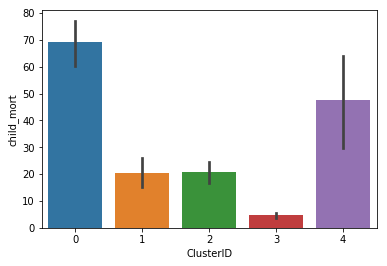

In [73]:
sns.barplot(x=data_n2.ClusterID, y=data_n2.child_mort)

C:\Users\rudra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


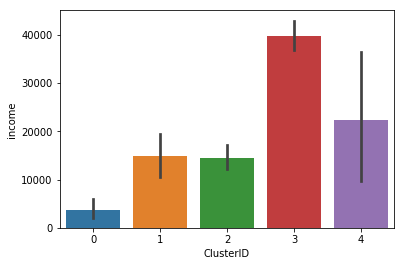

In [74]:
sns.barplot(x=data_n2.ClusterID, y=data_n2.income)

C:\Users\rudra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


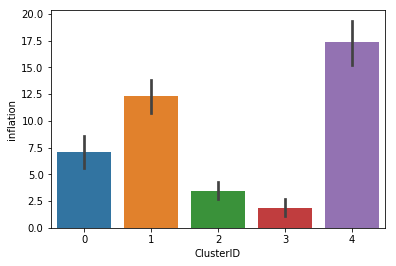

In [75]:
sns.barplot(x=data_n2.ClusterID, y=data_n2.inflation)

C:\Users\rudra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


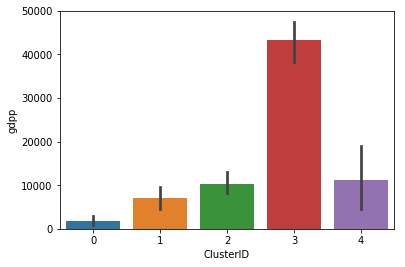

In [76]:
 sns.barplot(x=data_n2.ClusterID, y=data_n2.gdpp)

# CONCLUSION- K-MEANS AND HIERARCHICAL BOTH GIVES US BETTER RESULT . FROM K-MEANS WE CAN CONSIDER CLUSTER 2 AND CLUSTER 4 COUNTRIES IN NEED OF AID AND FROM HIERARCHICAL CLUSTER 4 SHOULD CONSIDER FOR NEED OF AID


# WE SHOULD FOCUS ON CLUSTER 2 AND 4 COUNTRIES

# final list of countries

In [77]:
final_list = pd.concat([df3,df4],axis = 0)

In [78]:
final_list1 = pd.concat([final_list,data4],axis = 0)

In [79]:
final_list1

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,2
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,2
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,2
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,2
71,Mauritania,97.4,608.4000,734.400,52.9200,3320,18.90,68.2,4.98,1200,2
100,Sudan,76.7,291.5600,254.560,93.5360,3370,19.60,66.3,4.88,1480,2
118,Yemen,56.3,393.0000,450.640,67.8580,4480,23.60,67.5,4.67,1310,2
1,Algeria,27.3,1712.6400,1400.440,185.9820,12900,16.10,76.5,2.89,4460,4
6,Azerbaijan,39.2,3171.1200,1208.880,343.3920,16000,13.80,69.1,1.92,5840,4
8,Bahrain,8.6,14386.5000,10536.300,1028.7900,41100,7.44,76.0,2.16,20700,4


# FINAL LIST HAS COUNTRIES FROM CLUSTER 2 AND 4 FROM K -MEANS AND CLUSTER 4 FROM HIERARCHICAL